In [16]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [17]:
load_dotenv()
model=ChatOpenAI()

In [18]:
class PCState(TypedDict):
    topic:str
    outline:str
    blog:str

In [19]:
def gen_outline(state:PCState)->PCState:
    topic=state['topic']
    prompt=f"""You have to act as a professional Content Strategist and you have to generate the outline of the topic.
    The topic is {topic}"""
    response=model.invoke(prompt)
    state['outline']=response.content
    return state
def gen_blog(state:PCState)->PCState:
    outline=state['outline']
    title=state['topic']
    prompt=f"""Given the following title and outline you have to make act as a professional content writter and write a blog on that.
    title: {title}
    outline: {outline}"""
    response=model.invoke(prompt)
    state['blog']=response.content
    return state

In [20]:
graph=StateGraph(PCState)
graph.add_node("gen_outline",gen_outline)
graph.add_node("gen_blog",gen_blog)
graph.add_edge(START,"gen_outline")
graph.add_edge("gen_outline","gen_blog")
graph.add_edge("gen_blog",END)
workflow=graph.compile()

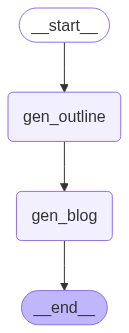

In [21]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [22]:
initial_state={
    "topic":"Life in Pakistan"
}
output_state=workflow.invoke(initial_state)
print(output_state)

{'topic': 'Life in Pakistan', 'outline': "I. Introduction\n    A. Brief overview of Pakistan\n    B. Importance of understanding life in Pakistan\n\nII. Geography and Climate\n    A. Overview of Pakistan's geographical features\n    B. Description of different regions and their topography\n    C. Climate variations across the country\n\nIII. Cultural Diversity\n    A. Ethnolinguistic groups in Pakistan\n    B. Major cultural festivals and celebrations\n    C. Traditional food and cuisine\n    D. Importance of religion in Pakistani culture\n\nIV. Social Structure\n    A. Family dynamics and importance of kinship\n    B. Education system and literacy rates\n    C. Healthcare infrastructure and challenges\n    D. Gender roles and women empowerment initiatives\n\nV. Economy and Industry\n    A. Overview of Pakistan's economy\n    B. Major industries and economic contributors\n    C. Unemployment rates and poverty levels\n    D. Challenges and opportunities for economic growth\n\nVI. Politi

In [23]:
print(output_state['outline'])

I. Introduction
    A. Brief overview of Pakistan
    B. Importance of understanding life in Pakistan

II. Geography and Climate
    A. Overview of Pakistan's geographical features
    B. Description of different regions and their topography
    C. Climate variations across the country

III. Cultural Diversity
    A. Ethnolinguistic groups in Pakistan
    B. Major cultural festivals and celebrations
    C. Traditional food and cuisine
    D. Importance of religion in Pakistani culture

IV. Social Structure
    A. Family dynamics and importance of kinship
    B. Education system and literacy rates
    C. Healthcare infrastructure and challenges
    D. Gender roles and women empowerment initiatives

V. Economy and Industry
    A. Overview of Pakistan's economy
    B. Major industries and economic contributors
    C. Unemployment rates and poverty levels
    D. Challenges and opportunities for economic growth

VI. Political Landscape
    A. Brief history of Pakistani politics
    B. Major

In [24]:
print(output_state['blog'])

Blog: Life in Pakistan

Introduction:

Pakistan is a country rich in history, culture, and diversity. Understanding life in Pakistan is essential to gaining a deeper appreciation for its people and society. In this blog, we will explore various aspects of life in Pakistan, including geography, culture, social structure, economy, politics, media, and the future outlook of the country.

Geography and Climate:

Pakistan's geographical features range from the towering peaks of the Himalayas in the north to the vast deserts of Thar in the south. The country is divided into different regions with diverse topography, ranging from mountains, plains, and valleys. The climate variations across Pakistan are significant, with regions experiencing extremes of temperature and weather patterns.

Cultural Diversity:

Pakistan is home to a variety of ethnolinguistic groups, each with its own unique traditions and customs. Major cultural festivals and celebrations, such as Eid, Basant, and Diwali, showc